In [6]:
!pip install qiskit

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for qiskit, since package 'wheel' is not installed.
Using legacy 'setup.py install' for python-constraint, since package 'wheel' is not installed.
    Running setup.py install for python-constraint: started
    Running setup.py install for python-constraint: finished with status 'done'
    Running setup.py install for qiskit: started
    Running setup.py install for qiskit: finished with status 'done'


In [7]:


import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram



In [8]:


#discrete time quantum random walk with a hadamard coin
had=QuantumCircuit(4)
qubits=had.qubits
#coin
had.h(0)

had.barrier()
#increment operator
had.mct(
    [qubits[0],qubits[1],qubits[2]], qubits[3])
had.ccx(0,1,2)
had.cx(0,1)

had.barrier()
#decrement operator
had.x([0,1,2])
had.mct(
    [qubits[0],qubits[1],qubits[2]], qubits[3])
had.ccx(0,1,2)
had.cx(0,1)
had.x([0,1,2])

had.draw()



┌───┐ ░                 ░ ┌───┐               ┌───┐
q_0: ┤ H ├─░───■────■────■───░─┤ X ├──■────■────■──┤ X ├
     └───┘ ░   │    │  ┌─┴─┐ ░ ├───┤  │    │  ┌─┴─┐├───┤
q_1: ──────░───■────■──┤ X ├─░─┤ X ├──■────■──┤ X ├┤ X ├
           ░   │  ┌─┴─┐└───┘ ░ ├───┤  │  ┌─┴─┐├───┤└───┘
q_2: ──────░───■──┤ X ├──────░─┤ X ├──■──┤ X ├┤ X ├─────
           ░ ┌─┴─┐└───┘      ░ └───┘┌─┴─┐└───┘└───┘     
q_3: ──────░─┤ X ├───────────░──────┤ X ├───────────────
           ░ └───┘           ░      └───┘

A coined discrete time quantum random walk (DTQW) is described by the tensor product of a coin Hilbert space and a position Hilbert space. It takes place on the vertices of a graph. The position space is augmented by the coin space spanned by two basis states {|0>, |1>} that help move the walker in a particular direction depending on the state of the coin. The coin operator enables us to superimpose both states equally. 
There are different kinds of operators that act as coins in the DTQW and exhibit different behaviors during the walks. Therefore we chose the Grover coin and the Hadamard coin to compare during a walk. 
We chose the Hadamard gate to act as the Hadamard coin and the Grover diffusion operator to act as the Grover coin for our circuits.

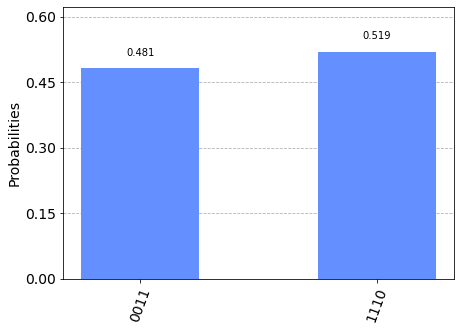

In [9]:
had.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(had)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [11]:


#discrete time quantum random walk with a grover coin 
grover = QuantumCircuit(2) 
# Coin operator
grover.h([0,1])
grover.z([0,1])
grover.cz(0,1)
grover.h([0,1])

grover_gate = grover.to_instruction()



In [13]:
circ=QuantumCircuit(4)
circ.append(grover_gate,[0,1,2,3])
circ.barrier()
#increment operator
circ.mct(
    [qubits[0],qubits[1],qubits[2]], qubits[3])
circ.ccx(0,1,2)
circ.cx(0,1)

circ.barrier()
#decrement operator
circ.x([0,1,2])
circ.mct(
    [qubits[0],qubits[1],qubits[2]], qubits[3])
circ.ccx(0,1,2)
circ.cx(0,1)
circ.x([0,1,2])
circ.draw()



CircuitError: 'The amount of qubit arguments 4 does not match the instruction expectation (2).'

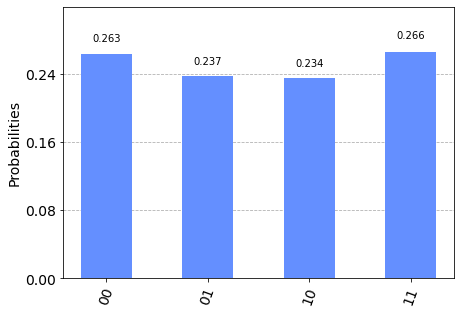

In [14]:


grover.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)



It is observed that the hadamard coin shows equal probabilities of the walker traversing the walk in a particular direction as compared to the other. Whereas the grover coin does not put the walker in an equal superposition as the Hadamard coin does. Instead, one state has a much larger probability than the other states.
Therefore if we start the quantum walk in an equal superposition of all the directions and measure the grover coin space after
each iteration the resulting (classical) walk will have a
higher propensity to go back and forth on the same edge
than to switch directions.
To demonstrate this, we can run this circuit repeatedly to get approximately the same walk